In [10]:
import pandas as pd
import numpy as np
import random

# constants
END_TOKEN = "E"
PAD_TOKEN = "P"
START_TOKEN = "S"
MAX_SEQ_LENGTH = 102
file_names = ["ADAR1_seq.txt", "ADAR2_seq.txt", "ADAR3_seq.txt", "Endogenous_ADAR1_seq.txt"]
ADAR_types = ["ADAR1", "ADAR2", "ADAR3", "Endogenous_ADAR1"]
vocabulary = {'A': 0, 'T': 1, 'C': 2, 'G': 3, 'E': 4, 'P': 5, 'other': 6, 'S': 7}
Location_vocab = {'Intron': 0, 'Intergenic': 1, 'lncRNA': 2, 'UTR': 3, 
                  'CDS': 4, 'tRNA': 5, 'miRNA': 6, 'rRNA': 7, 'other ncRNAs': 8, 'other': 9}
Chromosome_vocab = {'1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10,
                    '11': 11, '12': 12, '13': 13, '14': 14, '15': 15, '16': 16, '17': 17, '18': 18, '19': 19,
                    '20': 20, '21': 21, '22': 22, 'X': 23, 'Y': 24, 'MT': 25, 'other': 26}
RepeatType_vocab = {'Alu':0, 'Repetitive non-Alu': 1, 'Nonrepetitive': 2, 'other': 3}
ADAR_type_vocab = {'ADAR1': 0, 'ADAR2': 1, 'ADAR3': 2, 'Endogenous_ADAR1': 3, 'other': 4}

vocab_size = len(vocabulary)
features_name = ['Substrate', 'Arm', 'Chromosome', 'Strand', 'Start', 'End', 
                'Sequence', 'Location', 'Region', 'RepeatType', 'Source', 'NA']
embed_features = ['Chromosome', 'Location', 'RepeatType', 'ADAR_type']

length = []
for filename in file_names:
    file_path = 'data/' + filename
    data = pd.read_csv(file_path, sep='\t', header=None, 
                        names=features_name)
    for _, group in data.groupby('Substrate'):
        if len(group) == 2:
            left, right = group[group['Arm'] == 'L'].iloc[0], group[group['Arm'] == 'R'].iloc[0]
            # 记录left和right的长度在length中
            length.append(len(left['Sequence']))
            length.append(len(right['Sequence']))

    

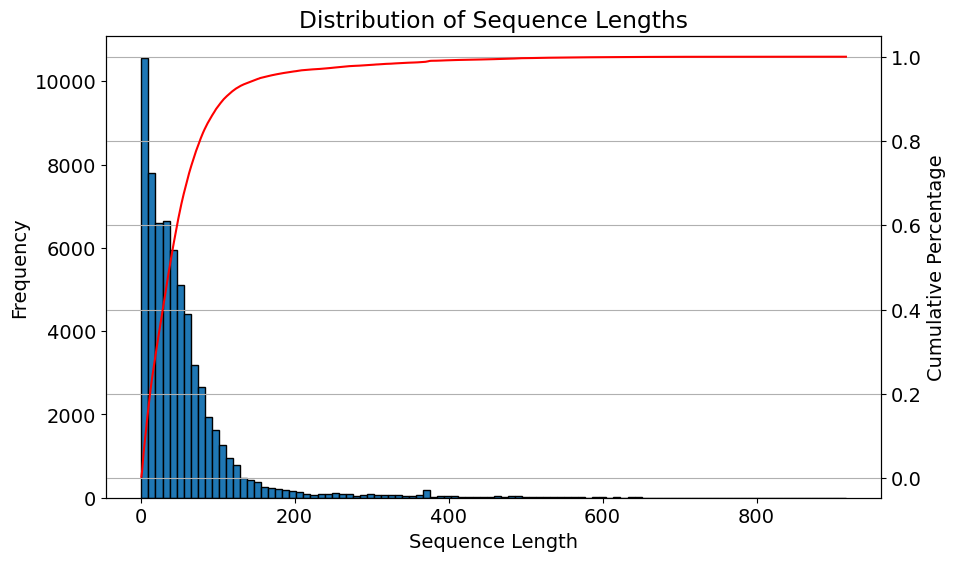

In [17]:
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 14})  # 设置字体大小

plt.figure(figsize=(10, 6))
plt.hist(length, bins=100, edgecolor='black')
plt.title('Distribution of Sequence Lengths')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')

# 计算百分比
length_counts = pd.Series(length).value_counts(normalize=True).sort_index()
length_counts_cumsum = length_counts.cumsum()

# 画出百分比曲线图在原图上
plt.twinx()
plt.plot(length_counts_cumsum.index, length_counts_cumsum.values, color='red')
plt.ylabel('Cumulative Percentage')
plt.grid(True)
plt.show()


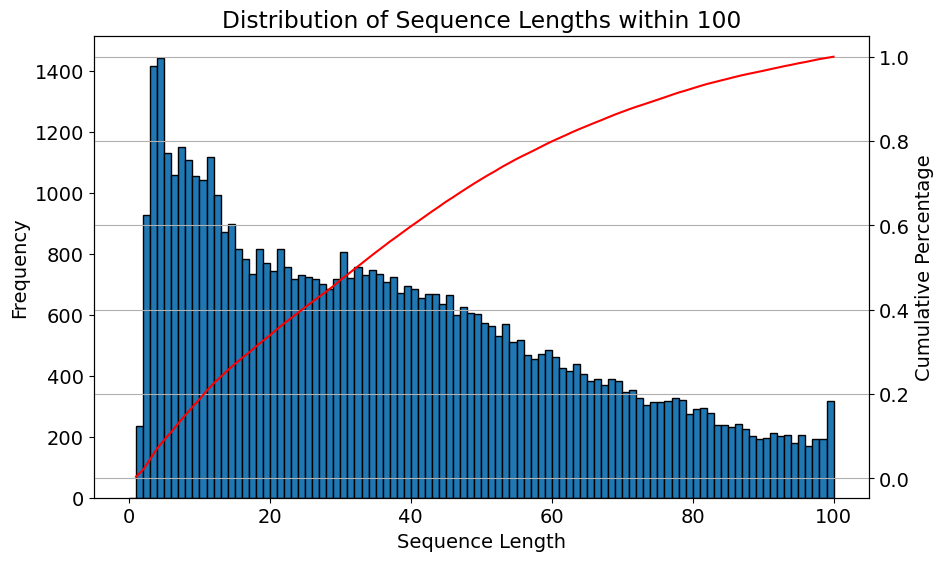

In [18]:
# 只画0～100的长度
plt.rcParams.update({'font.size': 14})  # 设置字体大小
plt.figure(figsize=(10, 6))
plt.hist(length, bins=100, range=(0, 100), edgecolor='black')
plt.title('Distribution of Sequence Lengths within 100')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')

# 计算百分比
length_counts_within_100 = pd.Series([l for l in length if l <= 100]).value_counts(normalize=True).sort_index()
length_counts_cumsum_within_100 = length_counts_within_100.cumsum()

# 画出百分比曲线图在原图上
plt.twinx()
plt.plot(length_counts_cumsum_within_100.index, length_counts_cumsum_within_100.values, color='red')
plt.ylabel('Cumulative Percentage')
plt.grid(True)
plt.show()